In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
covid_img = cv2.imread("covid_19.jpeg")

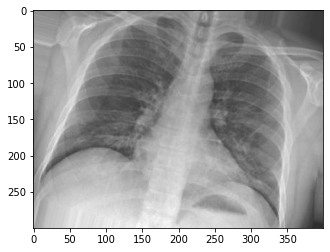

In [3]:
plt.imshow(covid_img)

In [4]:
bpneumonia_img = cv2.imread("bacterial_pnemonia.jpeg")

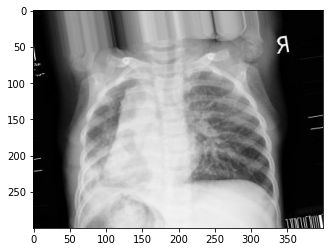

In [5]:
plt.imshow(bpneumonia_img)

In [6]:
vpneumonia_img = cv2.imread("viral_pnemonia.jpeg")

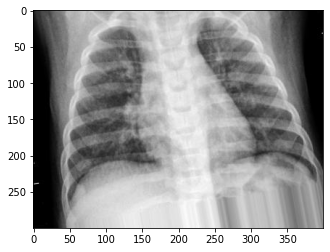

In [7]:
plt.imshow(vpneumonia_img)

In [8]:
normal_img = cv2.imread("normal.jpeg")

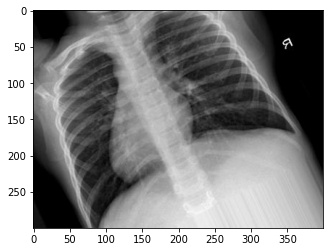

In [9]:
plt.imshow(normal_img)

# Intensity Transformations

## 1.Negative Transformation

### For Covid

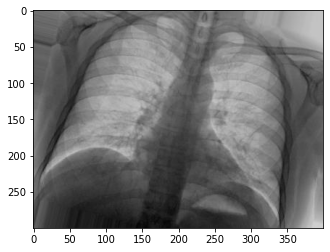

In [11]:
complement_covid_img = 255 - covid_img
plt.imshow(complement_covid_img)

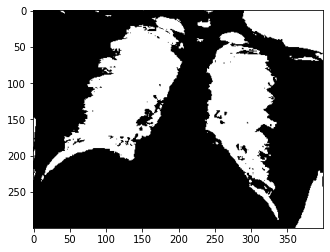

In [15]:
threshold_value = 130
ret, cthresholded_image = cv2.threshold(complement_covid_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cthresholded_image)

### For Bacterial Pneumonia

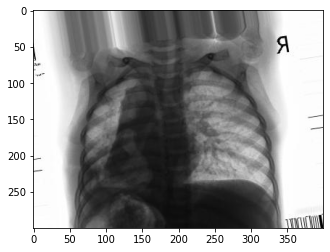

In [17]:
complement_bpneumonia_img = 255 - bpneumonia_img
plt.imshow(complement_bpneumonia_img)

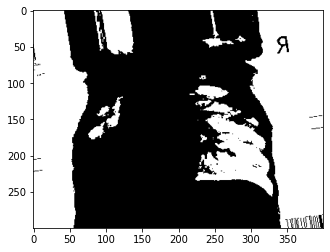

In [19]:
threshold_value = 130
ret, cthresholded_image = cv2.threshold(complement_bpneumonia_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cthresholded_image)

### For Viral

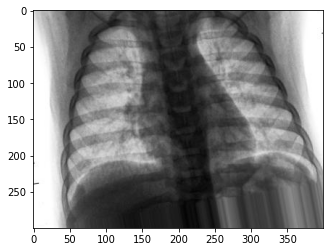

In [20]:
complement_vpneumonia_img = 255 - vpneumonia_img
plt.imshow(complement_vpneumonia_img)

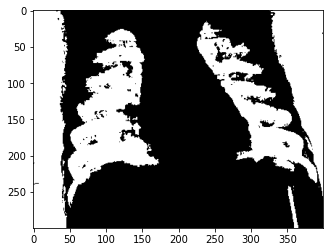

In [21]:
threshold_value = 130
ret, cthresholded_image = cv2.threshold(complement_vpneumonia_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cthresholded_image)

### For normal

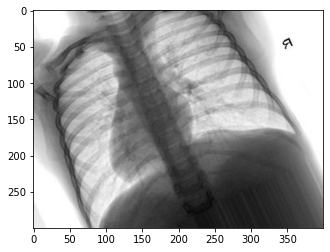

In [32]:
complement_normal_img = 255 - normal_img
plt.imshow(complement_normal_img)

## 2.Thresholding

### For covid

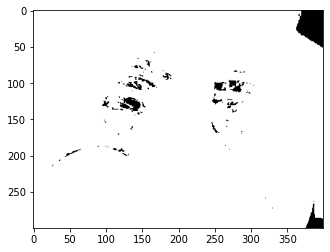

In [10]:
threshold_value = 75
ret, cthresholded_image = cv2.threshold(covid_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cthresholded_image)

### For Bacterial Pneumonia

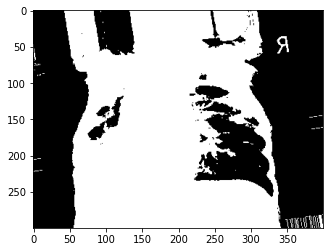

In [47]:
threshold_value = 128
ret, bthresholded_image = cv2.threshold(bpneumonia_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(bthresholded_image)

### For Viral Pneumonia

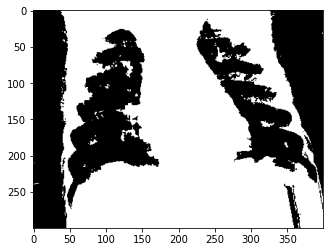

In [49]:
threshold_value = 128
ret, vthresholded_image = cv2.threshold(vpneumonia_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(vthresholded_image)

### For Normal

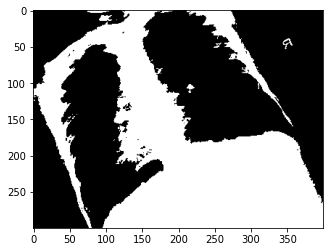

In [51]:
threshold_value = 128
ret, nthresholded_image = cv2.threshold(normal_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(nthresholded_image)

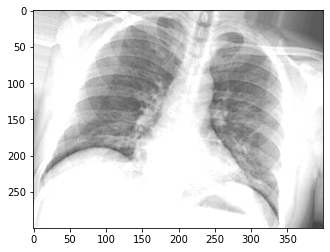

In [56]:
laplacian_covid = cv2.Laplacian(covid_img, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian_covid)

# Combine the original image with the sharpened image
sharpened_image = cv2.addWeighted(covid_img, 1.5, laplacian_abs, -0.5, 0)

plt.imshow(sharpened_image)

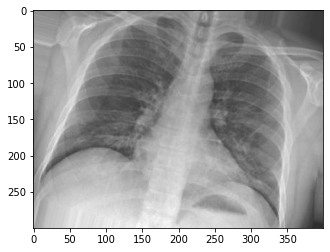

In [57]:
plt.imshow(covid_img)

# Histogram Equalization

In [99]:
jd_covid = cv2.imread("covid_19.jpeg",cv2.IMREAD_GRAYSCALE)
jd_bneumonia = cv2.imread("bacterial_pnemonia.jpeg",cv2.IMREAD_GRAYSCALE)
jd_vpneumonia = cv2.imread("viral_pnemonia.jpeg",cv2.IMREAD_GRAYSCALE)
jd_normal = cv2.imread("normal.jpeg",cv2.IMREAD_GRAYSCALE)

In [78]:
equalized_covid_image = cv2.equalizeHist(jd_covid)

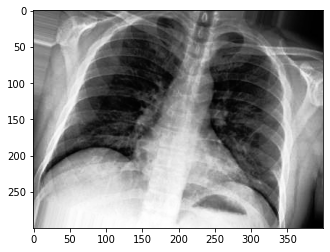

In [79]:
plt.imshow(cv2.cvtColor(equalized_image,cv2.COLOR_BGR2RGB))

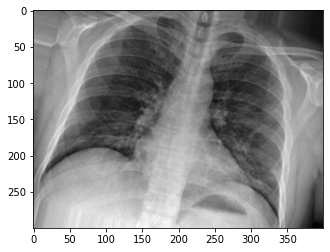

In [80]:
hist_original = cv2.calcHist([equalized_covid_image], [0], None, [256], [0, 256])

(0.0, 256.0)

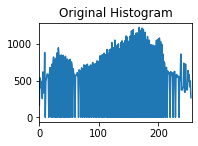

In [81]:
plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.plot(hist_original)
plt.xlim([0, 256])


In [83]:
import numpy as np
ksize = 7  # Kernel size (odd number)
sigma = 1.0  # Standard deviation of the Gaussian
theta = np.pi / 4  # Orientation of the Gabor filter (in radians)
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio (ellipticity of the filter)
psi = 0.0  # Phase offset

In [84]:
gabor_kernel = cv2.getGaborKernel(
    (ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F
)


In [85]:
gabor_kernel /= gabor_kernel.sum()


In [86]:
filtered_image = cv2.filter2D(jd_covid, cv2.CV_32F, gabor_kernel)


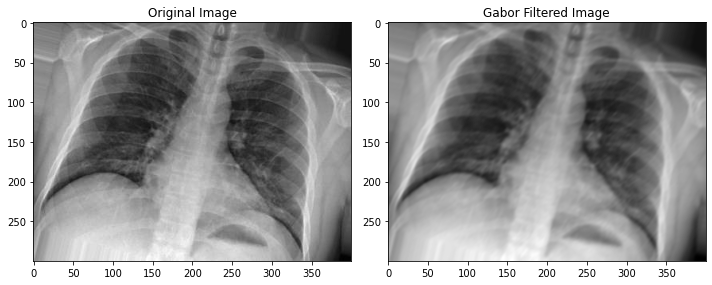

In [88]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(jd_covid, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gabor Filtered Image')
plt.imshow(filtered_image, cmap='gray')

plt.tight_layout()
plt.show()


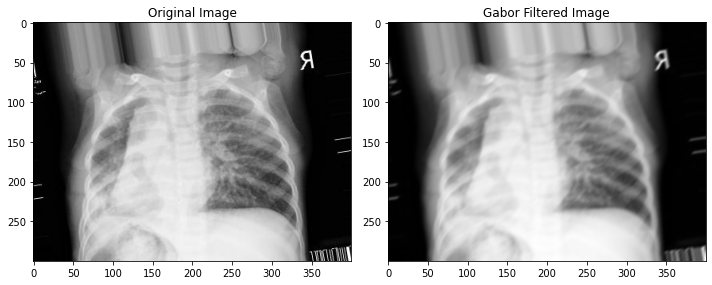

In [102]:
filtered_bpneumonia_image = cv2.filter2D(jd_bneumonia, cv2.CV_32F, gabor_kernel)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(jd_bneumonia, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gabor Filtered Image')
plt.imshow(filtered_bpneumonia_image, cmap='gray')

plt.tight_layout()
plt.show()


# Box Filter

## For Covid

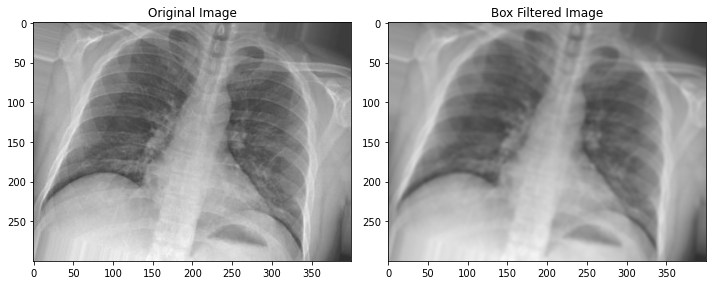

In [103]:
kernel_size = (5, 5)  # Change the size as needed

# Apply the box filter
filtered_image = cv2.boxFilter(covid_img, -1, kernel_size)

# Display the original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(covid_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Box Filtered Image')
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

## For Bacterial Pneumonia

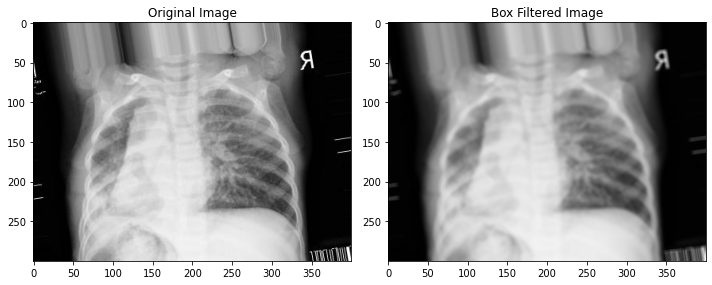

In [104]:
kernel_size = (5, 5)  # Change the size as needed

# Apply the box filter
filtered_image = cv2.boxFilter(bpneumonia_img, -1, kernel_size)

# Display the original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(bpneumonia_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Box Filtered Image')
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

## For Viral Pneumonia

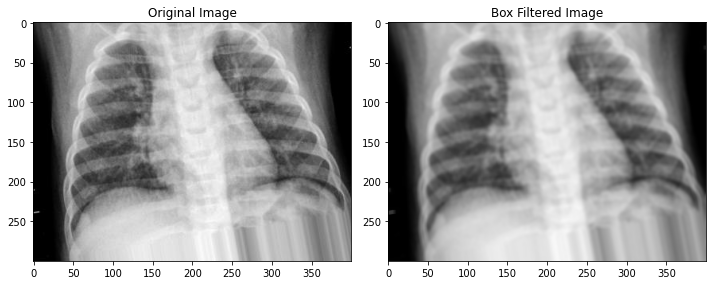

In [105]:
kernel_size = (5, 5)  # Change the size as needed

# Apply the box filter
filtered_image = cv2.boxFilter(vpneumonia_img, -1, kernel_size)

# Display the original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(vpneumonia_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Box Filtered Image')
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

## For Normal

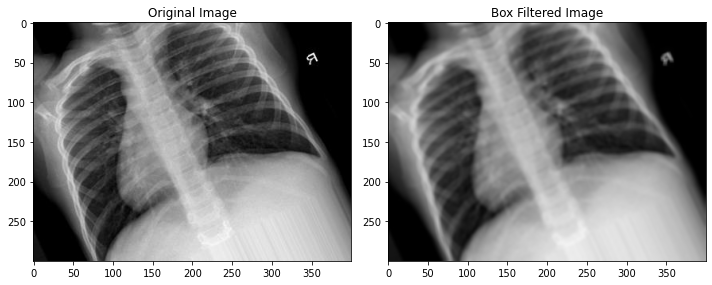

In [106]:
kernel_size = (5, 5)  # Change the size as needed

# Apply the box filter
filtered_image = cv2.boxFilter(normal_img, -1, kernel_size)

# Display the original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(normal_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Box Filtered Image')
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

# LAB EVAL2

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread('covid_19.jpeg', 0)

# Define the shape of the image and center
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Ideal Low-Pass Filter
def ideal_low_pass_filter(D, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(rows), np.arange(cols))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = (D_uv <= D).astype(np.float32)
    return H

# Butterworth Low-Pass Filter
def butterworth_low_pass_filter(D, n, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(rows), np.arange(cols))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = 1 / (1 + (D_uv / D)**(2 * n))
    return H

# Gaussian Low-Pass Filter
def gaussian_low_pass_filter(D, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(rows), np.arange(cols))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = np.exp(-D_uv**2 / (2 * D**2))
    return H

# Set the cutoff frequency D for the filters
D = 30  # Adjust this value to control the filter strength
n = 2   # For Butterworth filter

# Apply the filters in the frequency domain
ideal_filter = ideal_low_pass_filter(D, (rows, cols))
butterworth_filter = butterworth_low_pass_filter(D, n, (rows, cols))
gaussian_filter = gaussian_low_pass_filter(D, (rows, cols))

# Perform the filtering in the frequency domain
ideal_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * ideal_filter)))
butterworth_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * butterworth_filter)))
gaussian_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * gaussian_filter)))

# Display the original and filtered images
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(np.abs(ideal_result), cmap='gray'), plt.title('Ideal Filter')
plt.subplot(133), plt.imshow(np.abs(butterworth_result), cmap='gray'), plt.title('Butterworth Filter')
plt.show()

ValueError: operands could not be broadcast together with shapes (300,400) (400,300) 

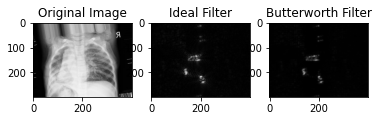

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread('bacterial_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)

# Get the shape of the image
rows, cols = img.shape

# Define the cutoff frequency D for the filters
D = 30  # Adjust this value to control the filter strength
n = 2   # For Butterworth filter

# Ideal Low-Pass Filter
def ideal_low_pass_filter(D, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = (D_uv <= D).astype(np.float32)
    return H

# Butterworth Low-Pass Filter
def butterworth_low_pass_filter(D, n, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = 1 / (1 + (D_uv / D)**(2 * n))
    return H

# Gaussian Low-Pass Filter
def gaussian_low_pass_filter(D, img_shape):
    rows, cols = img_shape
    center = (rows // 2, cols // 2)
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D_uv = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    H = np.exp(-D_uv**2 / (2 * D**2))
    return H

# Apply the filters in the frequency domain
ideal_filter = ideal_low_pass_filter(D, (rows, cols))
butterworth_filter = butterworth_low_pass_filter(D, n, (rows, cols))
gaussian_filter = gaussian_low_pass_filter(D, (rows, cols))  # Fixed a typo here

# Perform the filtering in the frequency domain
ideal_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * ideal_filter)))
butterworth_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * butterworth_filter)))
gaussian_result = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(img) * gaussian_filter)))

# Display the original and filtered images
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(np.abs(ideal_result), cmap='gray'), plt.title('Ideal Filter')
plt.subplot(133), plt.imshow(np.abs(butterworth_result), cmap='gray'), plt.title('Butterworth Filter')
#plt.subplot(134), plt.imshow(np.abs(gaussian_result), cmap='gray'), plt.title(' Gaussian Filter')
plt.show()


(<matplotlib.image.AxesImage at 0x2248da83eb0>,
 Text(0.5, 1.0, ' Gaussian Filter'))

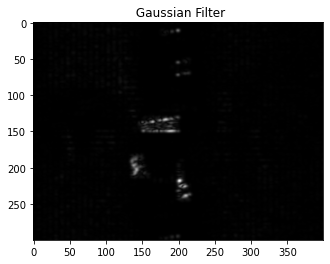

In [13]:
plt.imshow(np.abs(gaussian_result), cmap='gray'), plt.title(' Gaussian Filter')

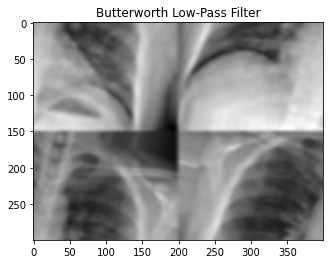

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('covid_19.jpeg', cv2.IMREAD_GRAYSCALE)

# Set the cutoff frequency and order
cutoff_frequency = 30
order = 2

# 2D Fourier Transform
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Butterworth low-pass filter
rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2
filter = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
        filter[i, j] = 1 / (1 + (distance / cutoff_frequency)**(2 * order))

# Filter in the frequency domain
filtered_dft = dft_shift * filter

# Inverse Fourier Transform
filtered_image = np.abs(np.fft.ifftshift(np.fft.ifft2(filtered_dft)))

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Butterworth Low-Pass Filter')
plt.show()


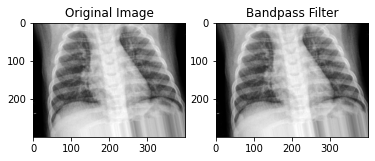

In [47]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('viral_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)

lower_cutoff =  0# Adjust this value according to your requirements
upper_cutoff = 150  # Adjust this value according to your requirements

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

# Create a filter mask
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        if lower_cutoff <= distance <= upper_cutoff:
            mask[i, j] = 1


filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Bandpass Filter')
plt.show()


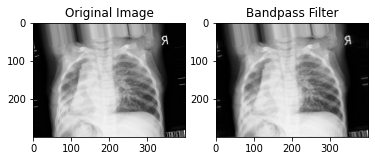

In [127]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('bacterial_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)

lower_cutoff =  0# Adjust this value according to your requirements
upper_cutoff = 60  # Adjust this value according to your requirements

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

# Create a filter mask
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        if lower_cutoff <= distance <= upper_cutoff:
            mask[i, j] = 1


filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Bandpass Filter')
plt.show()


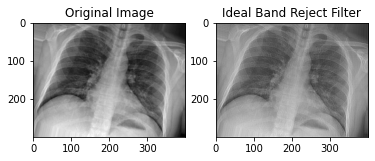

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('covid_19.jpeg', cv2.IMREAD_GRAYSCALE)

lower_cutoff =  0# Adjust this value according to your requirements
upper_cutoff = 60  # Adjust this value according to your requirements

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

# Create a filter mask
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        if lower_cutoff <= distance <= upper_cutoff:
            mask[i, j] = 1


filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image - 0.5*filtered_image, cmap='gray'), plt.title('Reject Filter')
plt.show()

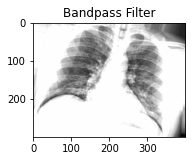

In [117]:
plt.subplot(122), plt.imshow(image-filtered_image, cmap='gray'), plt.title('Bandpass Filter')
plt.show()


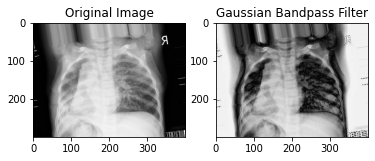

In [145]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('bacterial_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)

lower_cutoff =  100# Adjust this value according to your requirements
upper_cutoff = 250  # Adjust this value according to your requirements

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

sigma = 10  # Adjust this value according to your requirements
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = np.exp(-(distance ** 2) / (2 * sigma ** 2))

mask = 1 - mask  # Invert the filter to create a bandpass effect

filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Gaussian Bandpass Filter')
plt.show()


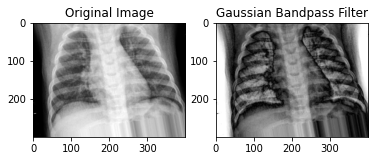

In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('viral_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)



dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

sigma = 10  # Adjust this value according to your requirements
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = np.exp(-(distance ** 2) / (2 * sigma ** 2))

mask = 1 - mask  # Invert the filter to create a bandpass effect

filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Gaussian Bandpass Filter')
plt.show()

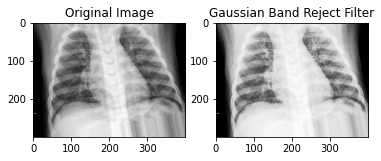

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('viral_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)



dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

sigma = 10  # Adjust this value according to your requirements
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = np.exp(-(distance ** 2) / (2 * sigma ** 2))

mask = 1 - mask  # Invert the filter to create a bandpass effect

filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image - 0.5* filtered_image, cmap='gray'), plt.title('Gaussian Band Reject Filter')
plt.show()

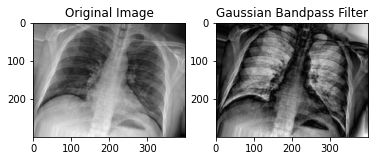

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('covid_19.jpeg', cv2.IMREAD_GRAYSCALE)

lower_cutoff = 0# Adjust this value according to your requirements
upper_cutoff = 20  # Adjust this value according to your requirements

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

sigma = 7 # Adjust this value according to your requirements
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = np.exp(-(distance ** 2) / (2 * sigma ** 2))

mask = 1 - mask  # Invert the filter to create a bandpass effect

filtered_dft = dft_shift * mask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Gaussian Bandpass Filter')
plt.show()

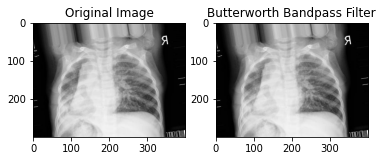

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image
image = cv2.imread('bacterial_pnemonia.jpeg', cv2.IMREAD_GRAYSCALE)

# Set the lower and upper cutoff frequencies and the filter order
lower_cutoff = 50 # Adjust this value according to your requirements
upper_cutoff = 150 # Adjust this value according to your requirements
order = 2  # Adjust this value according to your requirements

# Calculate the 2D Fourier Transform of the image
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create the Butterworth bandpass filter in the frequency domain
rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = 1 / (1 + (distance / upper_cutoff) ** (2 * order))
        mask[i, j] *= 1 - 1 / (1 + (distance / lower_cutoff) ** (2 * order))

# Apply the filter to the Fourier-transformed image
filtered_dft = dft_shift * (1-mask)

# Calculate the inverse Fourier Transform to obtain the filtered image
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

# Display the original and filtered images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Butterworth Bandpass Filter')
plt.show()


(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

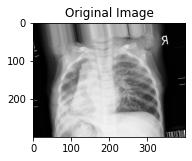

In [2]:
plt.subplot(121), plt.imshow(image-0.5*filtered_image, cmap='gray'), plt.title('Band Reject Image')

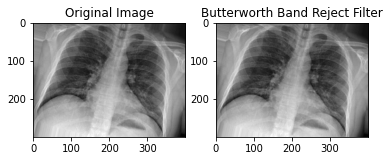

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image
image = cv2.imread('covid_19.jpeg', cv2.IMREAD_GRAYSCALE)

# Set the lower and upper cutoff frequencies and the filter order
lower_cutoff = 50 # Adjust this value according to your requirements
upper_cutoff = 150 # Adjust this value according to your requirements
order = 2  # Adjust this value according to your requirements

# Calculate the 2D Fourier Transform of the image
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create the Butterworth bandpass filter in the frequency domain
rows, cols = image.shape
center_row = rows // 2
center_col = cols // 2

mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = 1 / (1 + (distance / upper_cutoff) ** (2 * order))
        mask[i, j] *= 1 - 1 / (1 + (distance / lower_cutoff) ** (2 * order))

# Apply the filter to the Fourier-transformed image
filtered_dft = dft_shift * (1-mask)

# Calculate the inverse Fourier Transform to obtain the filtered image
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))

# Display the original and filtered images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image - 0.5*filtered_image, cmap='gray'), plt.title('Butterworth Band Reject Filter')
plt.show()
